# Install package


In [1]:
!pip install emoji
!pip install pythainlp

     |████████████████████████████████| 175 kB 5.1 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=5ff36965a97f6de459af3aadc99496a2569fedbff1599b990ee4bba8ae585027
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 11.5 MB 5.1 MB/s 


In [2]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# Data Processing

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
sheet1 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinopharm_pfizer.xlsx',sheet_name='Sheet1')

In [5]:
sheet1.shape

(1, 3)

In [6]:
sheet1.head()

user_name     create_at  \
0  @JJbabyduck  Sep 19, 2021   

                                                text  
0  น้องเราเป็นนักเรียนอายุ16 ได้ฉีดวัคซีนไขว้ ซิโ...

In [7]:
sheet2 = pd.read_excel('/content/gdrive/My Drive/dataset_701/sinopharm_pfizer.xlsx',sheet_name='Sheet2')

In [8]:
sheet2.shape

(1, 3)

In [9]:
sheet2.head()

user_name     create_at                                text
0  @PopcornYBB85  Dec 19, 2021  2 เข็มแรก ซิโนฟาร์ม เข็ม 2 ไฟเซอร์

In [10]:
data1 = sheet1[['text']]
data2 = sheet2[['text']]
data3 = pd.concat([data1,data2])

In [11]:
data3.shape

(2, 1)

# Bag-of-Words

In [12]:
def slash_tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

d_data = data3["text"].dropna()
vectorizer = CountVectorizer(tokenizer=slash_tokenize)
transformed_data = vectorizer.fit_transform(d_data)
hash_tag_cnt_df= pd.DataFrame(columns = ['word', 'count']) 
hash_tag_cnt_df['word'] = vectorizer.get_feature_names()
hash_tag_cnt_df['count'] = np.ravel(transformed_data.sum(axis=0))
hash_tag_cnt_df.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
0                 2 เข็มแรก ซิโนฟาร์ม เข็ม 2 ไฟเซอร์      1
1  น้องเราเป็นนักเรียนอายุ16 ได้ฉีดวัคซีนไขว้ ซิโ...      1

In [13]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    text = text.replace("%","เปอร์เซ็นต์")
    text = text.replace("ฯ"," ")
    text = text.replace("#"," ")
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in data3["text"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


word  count
17     ไฟ       2
2      ซิ       2
15     โน       2
6   ฟาร์ม       2
11   เข็ม       2
10    เข็ม      1
16   ไขว้       1
14  เซอร์       1
13   เซอร์      1
12   เค้า       1

In [14]:
!wget "https://www.f0nt.com/download/sipafonts/THSarabunNew.zip"
!unzip "THSarabunNew.zip"


--2022-04-23 15:45:17--  https://www.f0nt.com/download/sipafonts/THSarabunNew.zip
Resolving www.f0nt.com (www.f0nt.com)... 103.246.18.21, 2401:5700:100:503::1821
Connecting to www.f0nt.com (www.f0nt.com)|103.246.18.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.f0nt.com/files/sipafonts/THSarabunNew.zip [following]
--2022-04-23 15:45:18--  https://www.f0nt.com/files/sipafonts/THSarabunNew.zip
Reusing existing connection to www.f0nt.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 434047 (424K) [application/zip]
Saving to: ‘THSarabunNew.zip’

THSarabunNew.zip    100%[===================>] 423.87K   427KB/s    in 1.0s    

2022-04-23 15:45:20 (427 KB/s) - ‘THSarabunNew.zip’ saved [434047/434047]

Archive:  THSarabunNew.zip
  inflating: THSarabunNew Italic.ttf  
   creating: __MACOSX/
  inflating: __MACOSX/._THSarabunNew Italic.ttf  
  inflating: THSarabunNew.ttf        
  inflating: __MACOSX/._THSarabunNew.ttf  
  inflating: TH

In [15]:
!mv THSarabunNew.ttf /usr/share/fonts/truetype/

In [16]:
path = '/usr/share/fonts/truetype/THSarabunNew'

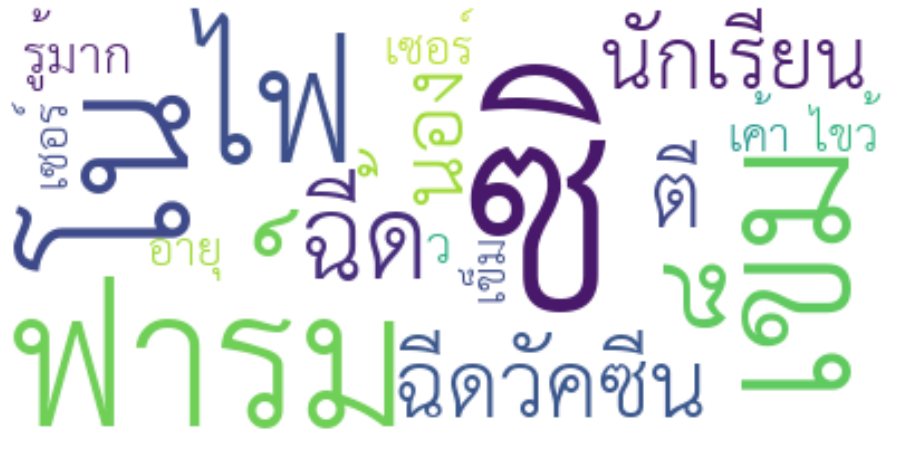

In [17]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path=path,background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [18]:
import requests
url = "https://api.aiforthai.in.th/ssense"

data = {'text':data3.iloc[0]}
headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
 
response = requests.post(url, data=data, headers=headers)


print(response.json())

{'sentiment': {'score': '0', 'polarity-neg': False, 'polarity-pos': False, 'polarity': ''}, 'preprocess': {'input': 'น้องเราเป็นนักเรียนอายุ16 ได้ฉีดวัคซีนไขว้ ซิโนฟาร์ม×ไฟเซอร์ เราอยากรู้มากเลยทำไมเค้าไม่ฉีดตีวเดียว2เข็ม', 'neg': [], 'pos': [], 'segmented': ['น้อง', 'เรา', 'เป็น', 'นักเรียน', 'อายุ', '16', ' ', 'ได้', 'ฉีดวัคซีน', 'ไขว้', ' ', 'ซิ', 'โน', 'ฟาร์ม', '×', 'ไฟ', 'เซอร์', ' ', 'เรา', 'อยากรู้', 'มาก', 'เลย', 'ทำไม', 'เค้า', 'ไม่', 'ฉีด', 'ตี', 'ว', 'เดียว', '2', 'เข็ม'], 'keyword': ['น้อง', 'นักเรียน', 'อายุ', 'ฉีดวัคซีน', 'ไขว้', 'ซิ', 'โน', 'ฟาร์ม', 'ไฟ', 'เซอร์', 'เค้า', 'ฉีด', 'ตี', 'เข็ม']}, 'alert': [], 'comparative': [], 'associative': [], 'intention': {'request': '66.67', 'sentiment': '0', 'question': '83.33', 'announcement': '0'}}


In [20]:
import requests
import seaborn as sns
import pandas as pd
import json

for i in range(0,2):
  url = "https://api.aiforthai.in.th/ssense"
  data = {'text':data3.iloc[i]}
  headers = {
    'Apikey': "GGROzYk8wbWN5uPPoe6p8qZCmSnJlrqX"
    }
  response = requests.post(url, data=data, headers=headers)
  #print(response.json())
  j1 = json.loads(response.text)
  j2 = j1["sentiment"]
  j3 = j2["polarity"]

  print(j3)
  #sns.lineplot(j3)

##Read result from analysis process

In [21]:
with open('/content/gdrive/My Drive/output_701/sinopharm_pfizer.txt', 'r') as f:
    #print(sum(line.count("negative") for line in f))
    output1 = (sum(line.count("negative") for line in f))

In [22]:
print(output1)

0


In [23]:
with open('/content/gdrive/My Drive/output_701/sinopharm_pfizer.txt', 'r') as f:
    #print(sum(line.count("positive") for line in f))
    output2 = (sum(line.count("positive") for line in f))

In [24]:
print(output2)

0


In [25]:
output3 = data3.size - (output1+output2)

In [26]:
print(output3)

2


In [27]:
final1 = [output2,output3,output1]

In [28]:
print(final1)

[0, 2, 0]


In [29]:
final2 = output2+output3+output1
print(final2)

2


In [30]:
final_out2 = output2*100/final2
final_out1 = output1*100/final2
final_out3 = output3*100/final2

In [31]:
print("percent of positive sentiment is "'{:.2f}'.format(final_out2))
print("percent of neutral sentiment is "'{:.2f}'.format(final_out3))
print("percent of negative sentiment is "'{:.2f}'.format(final_out1))

percent of positive sentiment is 0.00
percent of neutral sentiment is 100.00
percent of negative sentiment is 0.00


In [32]:
final_last = [final_out2,final_out3,final_out1]

##Barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


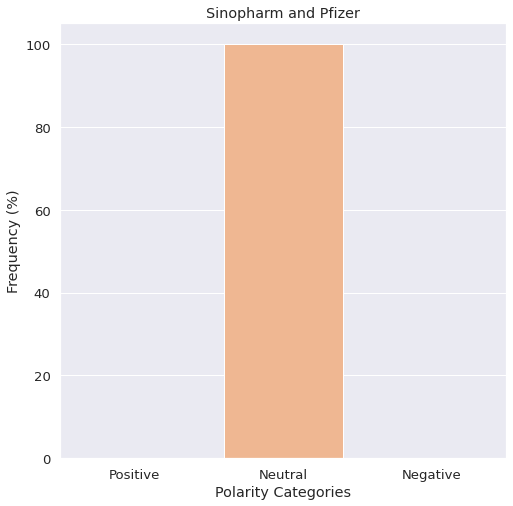

In [33]:
from google.colab import files

labels = ['Positive','Neutral','Negative']

#sns.set_style('ticks')
sns.set(font_scale = 1.2)
plt.figure(figsize=(8, 8))
ax = sns.barplot(labels,final_last, palette = 'pastel')
ax.set(title="Sinopharm and Pfizer")
plt.xlabel("Polarity Categories")
plt.ylabel("Frequency (%)")
plt.show()
#plt.savefig("sinopharm_pfizer.png")
#files.download("sinopharm_pfizer.png") 